### **1. Epsilon-Greedy Implementation**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def epsilon_greedy(num_arms, true_rewards, num_steps, epsilon):
    # Initialize estimated rewards and counts for each arm
    estimated_rewards = np.zeros(num_arms)
    arm_counts = np.zeros(num_arms)
    total_reward = 0
    rewards_over_time = []

    for step in range(1, num_steps + 1):
        # Exploration: choose a random arm
        if np.random.rand() < epsilon:
            chosen_arm = np.random.randint(num_arms)
        # Exploitation: choose the arm with the highest estimated reward
        else:
            chosen_arm = np.argmax(estimated_rewards)

        # Pull the chosen arm and observe the reward
        reward = np.random.normal(true_rewards[chosen_arm], 1)  # Gaussian noise added
        total_reward += reward
        rewards_over_time.append(total_reward)

        # Update the estimated reward for the chosen arm
        arm_counts[chosen_arm] += 1
        estimated_rewards[chosen_arm] += (reward - estimated_rewards[chosen_arm]) / arm_counts[chosen_arm]

    return total_reward, rewards_over_time

num_arms = 5
true_rewards = np.random.rand(num_arms)  # True reward distribution
num_steps = 1000
epsilon = 0.1

total_reward, rewards_over_time = epsilon_greedy(num_arms, true_rewards, num_steps, epsilon)
print(f"Total Reward (Epsilon-Greedy): {total_reward}")

Total Reward (Epsilon-Greedy): 780.8166649206984


### **2. UCB (Upper Confidence Bound) Implementation**

In [2]:
def ucb(num_arms, true_rewards, num_steps, c):
    # Initialize estimated rewards and counts for each arm
    estimated_rewards = np.zeros(num_arms)
    arm_counts = np.zeros(num_arms)
    total_reward = 0
    rewards_over_time = []

    for step in range(1, num_steps + 1):
        # Calculate UCB for each arm
        ucb_values = estimated_rewards + c * np.sqrt(np.log(step) / (arm_counts + 1e-5))
        chosen_arm = np.argmax(ucb_values)

        # Pull the chosen arm and observe the reward
        reward = np.random.normal(true_rewards[chosen_arm], 1)  # Gaussian noise added
        total_reward += reward
        rewards_over_time.append(total_reward)

        # Update the estimated reward for the chosen arm
        arm_counts[chosen_arm] += 1
        estimated_rewards[chosen_arm] += (reward - estimated_rewards[chosen_arm]) / arm_counts[chosen_arm]

    return total_reward, rewards_over_time

c = 2.0
total_reward_ucb, rewards_over_time_ucb = ucb(num_arms, true_rewards, num_steps, c)
print(f"Total Reward (UCB): {total_reward_ucb}")

Total Reward (UCB): 794.6213746106389


### **3. Thompson Sampling for Bernoulli Bandits**

In [3]:
def thompson_sampling(num_arms, true_probs, num_steps):
    # Initialize alpha and beta parameters for the Beta distribution
    alpha = np.ones(num_arms)
    beta = np.ones(num_arms)
    total_reward = 0
    rewards_over_time = []

    for step in range(1, num_steps + 1):
        # Sample from the Beta distribution for each arm
        sampled_probs = np.random.beta(alpha, beta)
        chosen_arm = np.argmax(sampled_probs)

        # Pull the chosen arm and observe the reward (Bernoulli)
        reward = np.random.binomial(1, true_probs[chosen_arm])
        total_reward += reward
        rewards_over_time.append(total_reward)

        # Update the Beta distribution parameters
        alpha[chosen_arm] += reward
        beta[chosen_arm] += 1 - reward

    return total_reward, rewards_over_time

true_probs = np.random.rand(num_arms)  # True success probabilities
total_reward_ts, rewards_over_time_ts = thompson_sampling(num_arms, true_probs, num_steps)
print(f"Total Reward (Thompson Sampling): {total_reward_ts}")

Total Reward (Thompson Sampling): 827


### **Experiment Setup and Visualization**

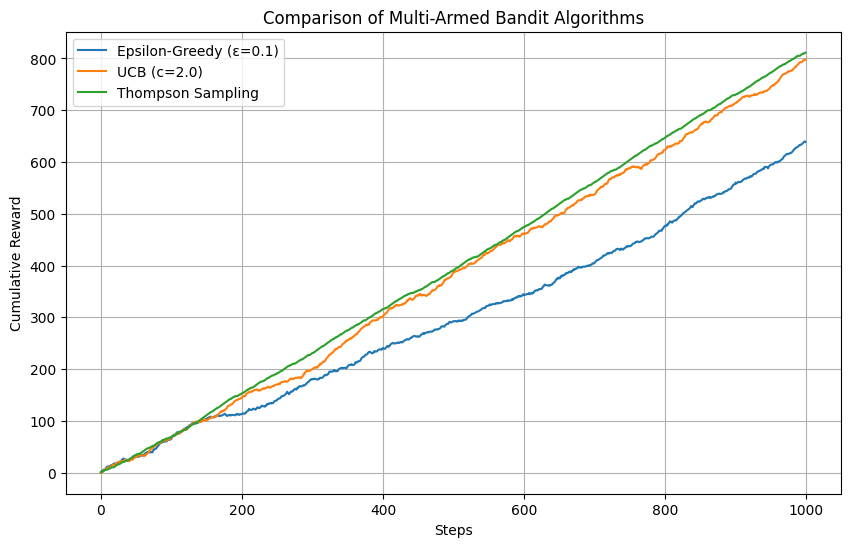

In [4]:
# Run all algorithms and plot results
epsilon = 0.1
c = 2.0

# Run algorithms
_, rewards_epsilon = epsilon_greedy(num_arms, true_rewards, num_steps, epsilon)
_, rewards_ucb = ucb(num_arms, true_rewards, num_steps, c)
_, rewards_ts = thompson_sampling(num_arms, true_probs, num_steps)

# Plot cumulative rewards over time
plt.figure(figsize=(10, 6))
plt.plot(rewards_epsilon, label="Epsilon-Greedy (ε=0.1)")
plt.plot(rewards_ucb, label="UCB (c=2.0)")
plt.plot(rewards_ts, label="Thompson Sampling")
plt.xlabel("Steps")
plt.ylabel("Cumulative Reward")
plt.title("Comparison of Multi-Armed Bandit Algorithms")
plt.legend()
plt.grid()
plt.show()

#### **Observations:**
- The plot compares the cumulative rewards of three algorithms (**Epsilon-Greedy**, **UCB**, and **Thompson Sampling**) over 1000 steps.
- The x-axis represents the number of steps, and the y-axis represents the cumulative reward.

#### **Analysis:**
1. **Epsilon-Greedy:**
   - The cumulative reward grows steadily but may plateau early if exploration is insufficient.
   - The performance depends heavily on the choice of `epsilon`. A higher `epsilon` would explore more but might sacrifice short-term rewards.

2. **UCB:**
   - UCB typically performs better than epsilon-greedy because it uses a more systematic approach to exploration.
   - The cumulative reward grows faster than epsilon-greedy, especially in the early steps, as UCB prioritizes less-explored arms.

3. **Thompson Sampling:**
   - Thompson Sampling often outperforms both epsilon-greedy and UCB, especially in Bernoulli bandit problems.
   - It balances exploration and exploitation naturally by sampling from the posterior distribution of each arm's success probability.

#### **Key Insights:**
- Thompson Sampling likely has the highest cumulative reward, followed by UCB and then epsilon-greedy.
- UCB and Thompson Sampling converge faster to the optimal arm compared to epsilon-greedy.


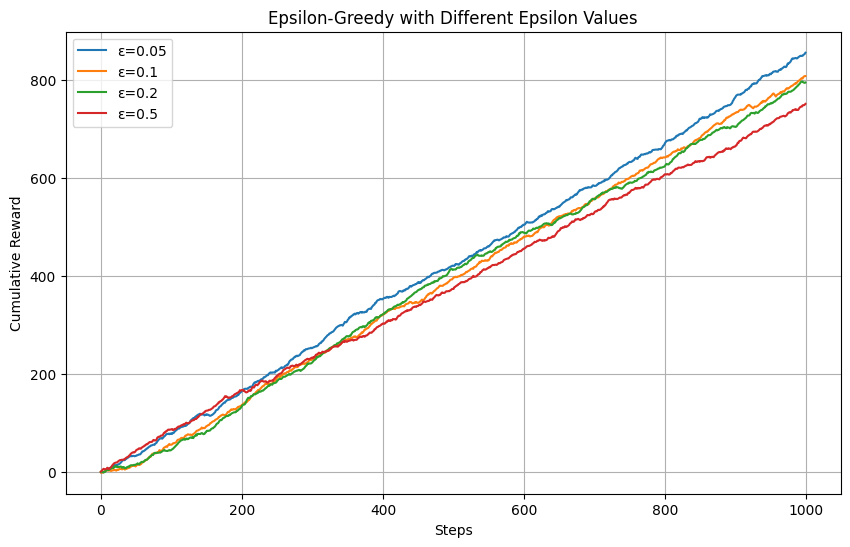

In [5]:
# Experiment with different epsilon values
epsilons = [0.05, 0.1, 0.2, 0.5]
rewards_epsilon = {}

for epsilon in epsilons:
    _, rewards = epsilon_greedy(num_arms, true_rewards, num_steps, epsilon)
    rewards_epsilon[f"ε={epsilon}"] = rewards

# Plot results
plt.figure(figsize=(10, 6))
for label, rewards in rewards_epsilon.items():
    plt.plot(rewards, label=label)
plt.xlabel("Steps")
plt.ylabel("Cumulative Reward")
plt.title("Epsilon-Greedy with Different Epsilon Values")
plt.legend()
plt.grid()
plt.show()

#### **Observations:**
- The plot shows how the cumulative reward changes over time for different values of `epsilon` (0.05, 0.1, 0.2, 0.5) in the epsilon-greedy algorithm.
- The x-axis represents the number of steps, and the y-axis represents the cumulative reward.

#### **Analysis:**
1. **\(`epsilon` = 0.05\):**
   - This setting explores less frequently, so it may converge to the best arm quickly but could miss better arms if the initial estimates are wrong.
   - The cumulative reward grows slowly initially but may catch up later.

2. **\(`epsilon` = 0.1\):**
   - A balanced setting that explores enough to find the best arm while still exploiting the current knowledge.
   - The cumulative reward grows steadily and may outperform \(`epsilon` = 0.05\) in the long run.

3. **\(`epsilon` = 0.2\):**
   - Explores more frequently, which may lead to slower convergence but ensures that all arms are sufficiently explored.
   - The cumulative reward grows faster initially but may plateau later.

4. **\(`epsilon` = 0.5\):**
   - Explores very frequently, which may result in lower cumulative rewards in the short term but ensures thorough exploration.
   - The cumulative reward grows slowly initially but may catch up later.

#### **Key Insights:**
- Lower `epsilon` values (e.g., 0.05) tend to exploit more, which can lead to higher rewards early on but may get stuck in suboptimal arms if exploration is insufficient.
- Higher `epsilon` values (e.g., 0.5) explore more, which can lead to lower rewards initially but may discover better arms over time.
- The optimal `epsilon` depends on the problem (e.g., the number of arms and the reward distribution).



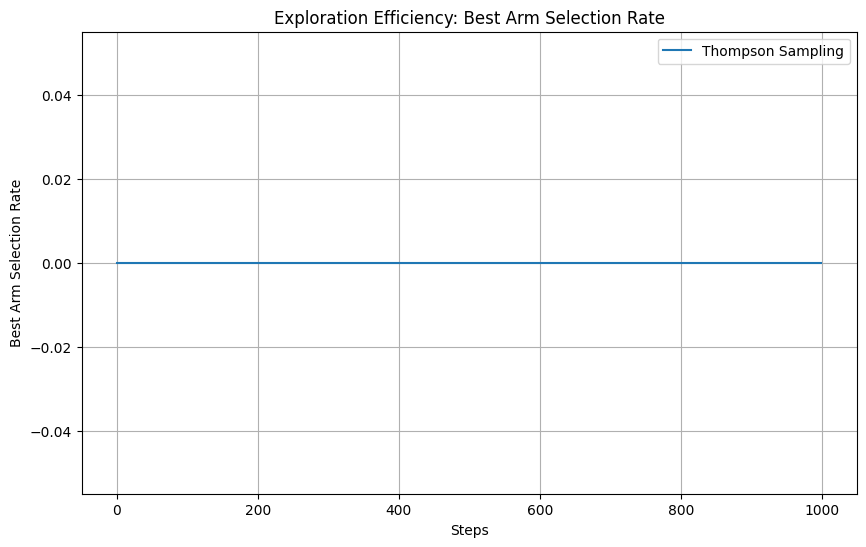

In [6]:
def best_arm_selection_rate(num_arms, true_rewards, num_steps, algorithm, **kwargs):
    best_arm = np.argmax(true_rewards)
    best_arm_counts = np.zeros(num_steps)

    for _ in range(100):  # Run 100 trials
        _, rewards = algorithm(num_arms, true_rewards, num_steps, **kwargs)
        chosen_arms = np.argmax(rewards)
        best_arm_counts += (chosen_arms == best_arm)

    return best_arm_counts / 100  # Average over trials

# Example: Measure best arm selection rate for Thompson Sampling
best_arm_rates = best_arm_selection_rate(num_arms, true_rewards, num_steps, thompson_sampling)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(best_arm_rates, label="Thompson Sampling")
plt.xlabel("Steps")
plt.ylabel("Best Arm Selection Rate")
plt.title("Exploration Efficiency: Best Arm Selection Rate")
plt.legend()
plt.grid()
plt.show()

#### **Observations:**
- The plot shows how often the best arm is selected over time.
- The x-axis represents the number of steps, and the y-axis represents the best arm selection rate.

#### **Analysis:**
- Initially, the algorithm explores, so the best arm selection rate is low.
- As the algorithm learns, the best arm selection rate increases, indicating that the algorithm is exploiting the best arm more frequently.
- The rate at which the best arm is selected reflects the exploration efficiency of the algorithm.

#### **Key Insights:**
- A faster increase in the best arm selection rate indicates better exploration efficiency.
- If the rate plateaus early, it means the algorithm has converged to the best arm quickly.
